<a href="https://colab.research.google.com/github/srisri2004/DAUP/blob/main/DAP_Week_2_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Scores (S):


,Mathematics,Science,English
Student 1,78.0,85.0,74.0
Student 2,88.0,79.0,82.0
Student 3,91.0,72.0,68.0


Bonus Marks (B):


,Mathematics,Science,English
Student 1,5.0,3.0,4.0
Student 2,2.0,5.0,3.0
Student 3,1.0,4.0,6.0


Final with Bonuses (F = S + B):


,Mathematics,Science,English
Student 1,83.0,88.0,78.0
Student 2,90.0,84.0,85.0
Student 3,92.0,76.0,74.0


Final after 5% Penalty (P = F * 0.95):


,Mathematics,Science,English
Student 1,78.85,83.6,74.10
Student 2,85.50,79.8,80.75
Student 3,87.40,72.2,70.30


Transposed Final (Subject-wise, P^T):


,Student 1,Student 2,Student 3
Mathematics,78.85,85.50,87.4
Science,83.60,79.80,72.2
English,74.10,80.75,70.3



--- Insights ---
Subject Averages (after penalty):
  Mathematics: 83.92
  Science: 78.53
  English: 75.05

Highest Average Subject: Mathematics (83.92)

Bonus-driven Improvement per Student:
  Student 1: +12.00 (pre-penalty), +11.40 (after penalty)
  Student 2: +10.00 (pre-penalty), +9.50 (after penalty)
  Student 3: +11.00 (pre-penalty), +10.45 (after penalty)

Most Improved due to Bonuses: Student 1


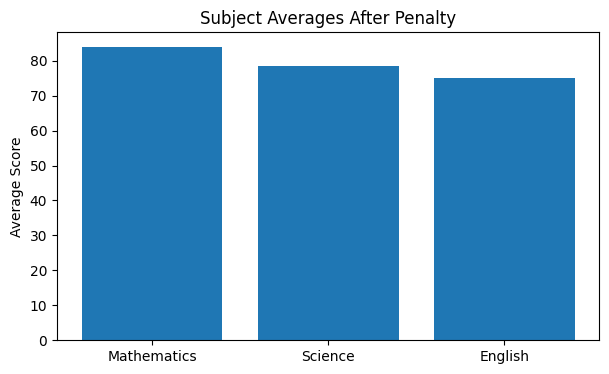

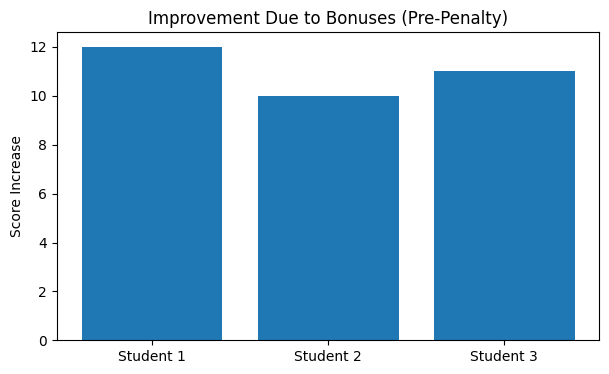

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Labels ----
students = ["Student 1", "Student 2", "Student 3"]
subjects = ["Mathematics", "Science", "English"]

# ---- 1) Original Score Matrix (S) ----
S = np.array([
    [78, 85, 74],  # Student 1
    [88, 79, 82],  # Student 2
    [91, 72, 68],  # Student 3
], dtype=float)

# ---- 2) Bonus Marks Matrix (B) ----
B = np.array([
    [5, 3, 4],   # Student 1
    [2, 5, 3],   # Student 2
    [1, 4, 6],   # Student 3
], dtype=float)

# ---- 3) Final with Bonuses (F) ----
F = S + B

# ---- 4) Apply 5% Penalty (P) ----
P = F * 0.95

# ---- 5) Transpose for subject-wise analysis (P_T) ----
P_T = P.T  # rows: subjects, cols: students

# ---- DataFrames for neat display ----
def df3(mat, row_labels, col_labels):
    return pd.DataFrame(mat, index=row_labels, columns=col_labels)

print("Original Scores (S):")
display(df3(S, students, subjects))

print("Bonus Marks (B):")
display(df3(B, students, subjects))

print("Final with Bonuses (F = S + B):")
display(df3(F, students, subjects))

print("Final after 5% Penalty (P = F * 0.95):")
display(df3(P, students, subjects))

print("Transposed Final (Subject-wise, P^T):")
display(df3(P_T, subjects, students))

# ---- 6) Insights ----
# Subject averages (across students)
subject_avgs = P_T.mean(axis=1)  # means per subject row
best_subject_idx = int(np.argmax(subject_avgs))
best_subject = subjects[best_subject_idx]

# Improvement due to bonuses (pre- and post-penalty)
bonus_gain_pre = B.sum(axis=1)               # S->F gain per student
bonus_gain_post = (0.95 * B).sum(axis=1)     # S*0.95 -> P gain per student
best_improver_idx = int(np.argmax(bonus_gain_pre))
best_improver = students[best_improver_idx]

print("\n--- Insights ---")
print("Subject Averages (after penalty):")
for sub, avg in zip(subjects, subject_avgs):
    print(f"  {sub}: {avg:.2f}")

print(f"\nHighest Average Subject: {best_subject} ({subject_avgs[best_subject_idx]:.2f})")

print("\nBonus-driven Improvement per Student:")
for stu, pre, post in zip(students, bonus_gain_pre, bonus_gain_post):
    print(f"  {stu}: +{pre:.2f} (pre-penalty), +{post:.2f} (after penalty)")

print(f"\nMost Improved due to Bonuses: {best_improver}")

# ---- Optional visuals ----
# 1) Bar chart: subject averages after penalty
plt.figure(figsize=(7,4))
plt.bar(subjects, subject_avgs)
plt.title("Subject Averages After Penalty")
plt.ylabel("Average Score")
plt.show()

# 2) Bar chart: bonus-driven improvement per student (pre-penalty)
plt.figure(figsize=(7,4))
plt.bar(students, bonus_gain_pre)
plt.title("Improvement Due to Bonuses (Pre-Penalty)")
plt.ylabel("Score Increase")
plt.show()